# Practica 0: Python - Monte Carlo

Metodos auxiliares

In [3]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np


def generar_puntos_random(X, a, b, M):
  """Genera X puntos random en el rectangulo [a, b] x [0, M]."""
  x_random = np.random.uniform(a, b, X)
  y_random = np.random.uniform(0, M, X)

  return x_random, y_random


def compara_tiempos(fun_1, fun_2, test_func, a, b):
  """Compara tiempo de ejecucion de fun_1 y fun_2."""
  sizes = np.linspace(100, 10000000, 20)
  times_fun_1 = []
  times_fun_2 = []

  for size in sizes:
    # generación de un variable x aleatorio
    x = np.random.uniform(1, 100, int(size))

    # mide tiempo de ejecucion de fun_1
    tic = time.process_time()
    dot = fun_1(test_func, a, b, int(size))
    toc = time.process_time()
    times_fun_1 += [1000 * (toc - tic)]

    # mide tiempo de ejecucion de fun_2
    tic = time.process_time()
    fast_dot = fun_2(test_func, a, b, int(size))
    toc = time.process_time()
    times_fun_2 += [1000 * (toc - tic)]

  plt.figure()
  plt.scatter(sizes, times_fun_1, c='red', label='bucle')
  plt.scatter(sizes, times_fun_2, c='blue', label='vector')
  plt.legend()
  plt.savefig('compara-tiempos-integra_mc.png')

Metodo 1: usando *num_puntos* iteraciones

In [4]:
def integra_mc_1(fun, a, b, num_puntos=10000):
  # cálculo de M (valor máximo dentro de intervalo)
  graph = np.linspace(a, b, num_puntos)
  m = np.max(fun(graph))

  # generación de "num_puntos"
  x_random, y_random = generar_puntos_random(num_puntos, a, b, m)
  puntos = list(zip(x_random, y_random))

  # cálculo de la integral
  puntos_dentro = 0

  for punto in puntos:
    if punto[1] <= fun(punto[0]):
      puntos_dentro += 1

  area_rectangulo = (b - a) * m
  area_bajo_curva = area_rectangulo * (puntos_dentro / num_puntos)

  return area_bajo_curva

In [5]:
integra_mc_1(lambda x: x**2 + x, 0, 1)

0.835

Metodo 1: comprobacion de resultado

In [6]:
# Comprobando resultado usando scipy.integrate.quad
from scipy.integrate import quad

quad(lambda x: x**2 + x, 0, 1)

(0.8333333333333335, 9.251858538542972e-15)

Metodo 2: usando numpy

In [7]:
import numpy as np

def integra_mc_2(fun, a, b, num_puntos=10000):
  # cálculo de M (valor máximo dentro de intervalo)
  graph = np.linspace(a, b, num_puntos)
  m = np.max(fun(graph))

  # m = valor_max(fun, a, b)[1]

  # generación de "num_puntos"
  puntos_x, puntos_y = generar_puntos_random(num_puntos, a, b, m)

  # utilice operaciones entre vectores para calcular resultado
  puntos_dentro = np.count_nonzero(puntos_y <= fun(puntos_x))
  area_rectangulo = (b - a) * m
  area_bajo_curva = area_rectangulo * (puntos_dentro / num_puntos)

  return area_bajo_curva

In [8]:
integra_mc_2(lambda x: x**2, 2, 4)

18.8192

Metodo 2: comprobacion de resultado

In [9]:
# Comprobando resultado usando scipy.integrate.quad
from scipy.integrate import quad

quad(lambda x: x**2, 2, 4)

(18.666666666666668, 2.0724163126336256e-13)

Comparacion de tiempos de ejecucion

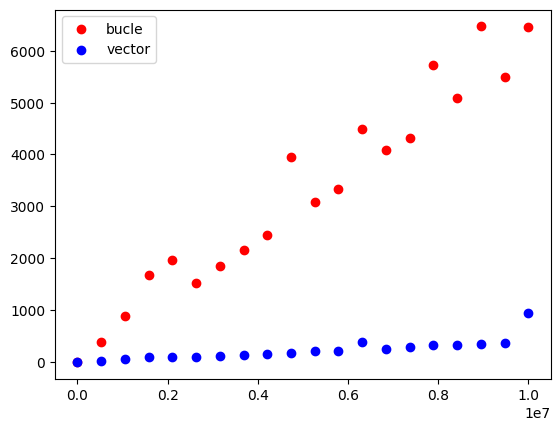

In [10]:
test_func = lambda x: x**2 + x
compara_tiempos(integra_mc_1, integra_mc_2, test_func, 0, 1)

## Conclusiones

En caso de bucle, el tiempo de ejecución crece rápidamente a medida que aumenta el número de puntos. El uso de bucles tradicionales es significativamente más lento.

Usando vectores con NumPy, el tiempo de ejecución crece mucho más lentamente en comparación con los bucles. El enfoque vectorizado aprovecha optimizaciones internas de NumPy que usan operaciones en bloque y optimizaciones a nivel de hardware, lo que reduce la sobrecarga de los bucles en Python.

Pues, si estás realizando integraciones en Python, es altamente recomendable utilizar NumPy y técnicas de vectorización siempre que sea posible.